In [1]:
import os
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
os.chdir("C:/Users/migro/Diplomado")
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split, cross_validate
from sklearn.preprocessing import PolynomialFeatures
from numpy.random import randn, seed
from sklearn.ensemble import BaggingRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

%config InlineBackend.figure_format = "retina"

import sys
sys.path.append("../files")
import utils

In [2]:
#CARGAMOS BASE DE HOUSING
housing = pd.read_csv("../Diplomado/ModuloIV/datos/house-prices-advanced-regression-techniques/train.csv")
#OBSERVAMOS LAS PRIERAS CINCO OBSERVACIONES
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
#SUMARIZAMOS CADA VARIABLE
housing.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [4]:
#CALCULAMOS LA CORRELACIÓN DE PEARSON
cor = housing.corr()

In [5]:
#CORRELACION CON LA VARIABLE DE RESPUESTA
cor_target = abs(cor['SalePrice'])
#VARIABLES MÁS CORRELACIONADAS (MÁS DE .5)
relevant_features = cor_target[cor_target>0.5]
relevant_features
lista=list(relevant_features.index)#+['MSZoning', 'SaleCondition']
relevant_features

OverallQual     0.790982
YearBuilt       0.522897
YearRemodAdd    0.507101
TotalBsmtSF     0.613581
1stFlrSF        0.605852
GrLivArea       0.708624
FullBath        0.560664
TotRmsAbvGrd    0.533723
GarageCars      0.640409
GarageArea      0.623431
SalePrice       1.000000
Name: SalePrice, dtype: float64

In [6]:
#NOS QUEDAMOS CON LAS VARIABLES MÁS CORRELACIONADAS A SALEPRICE
housing=housing[lista]
housing=housing.dropna()
housing.head()

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice
0,7,2003,2003,856,856,1710,2,8,2,548,208500
1,6,1976,1976,1262,1262,1262,2,6,2,460,181500
2,7,2001,2002,920,920,1786,2,6,2,608,223500
3,7,1915,1970,756,961,1717,1,7,3,642,140000
4,8,2000,2000,1145,1145,2198,2,9,3,836,250000


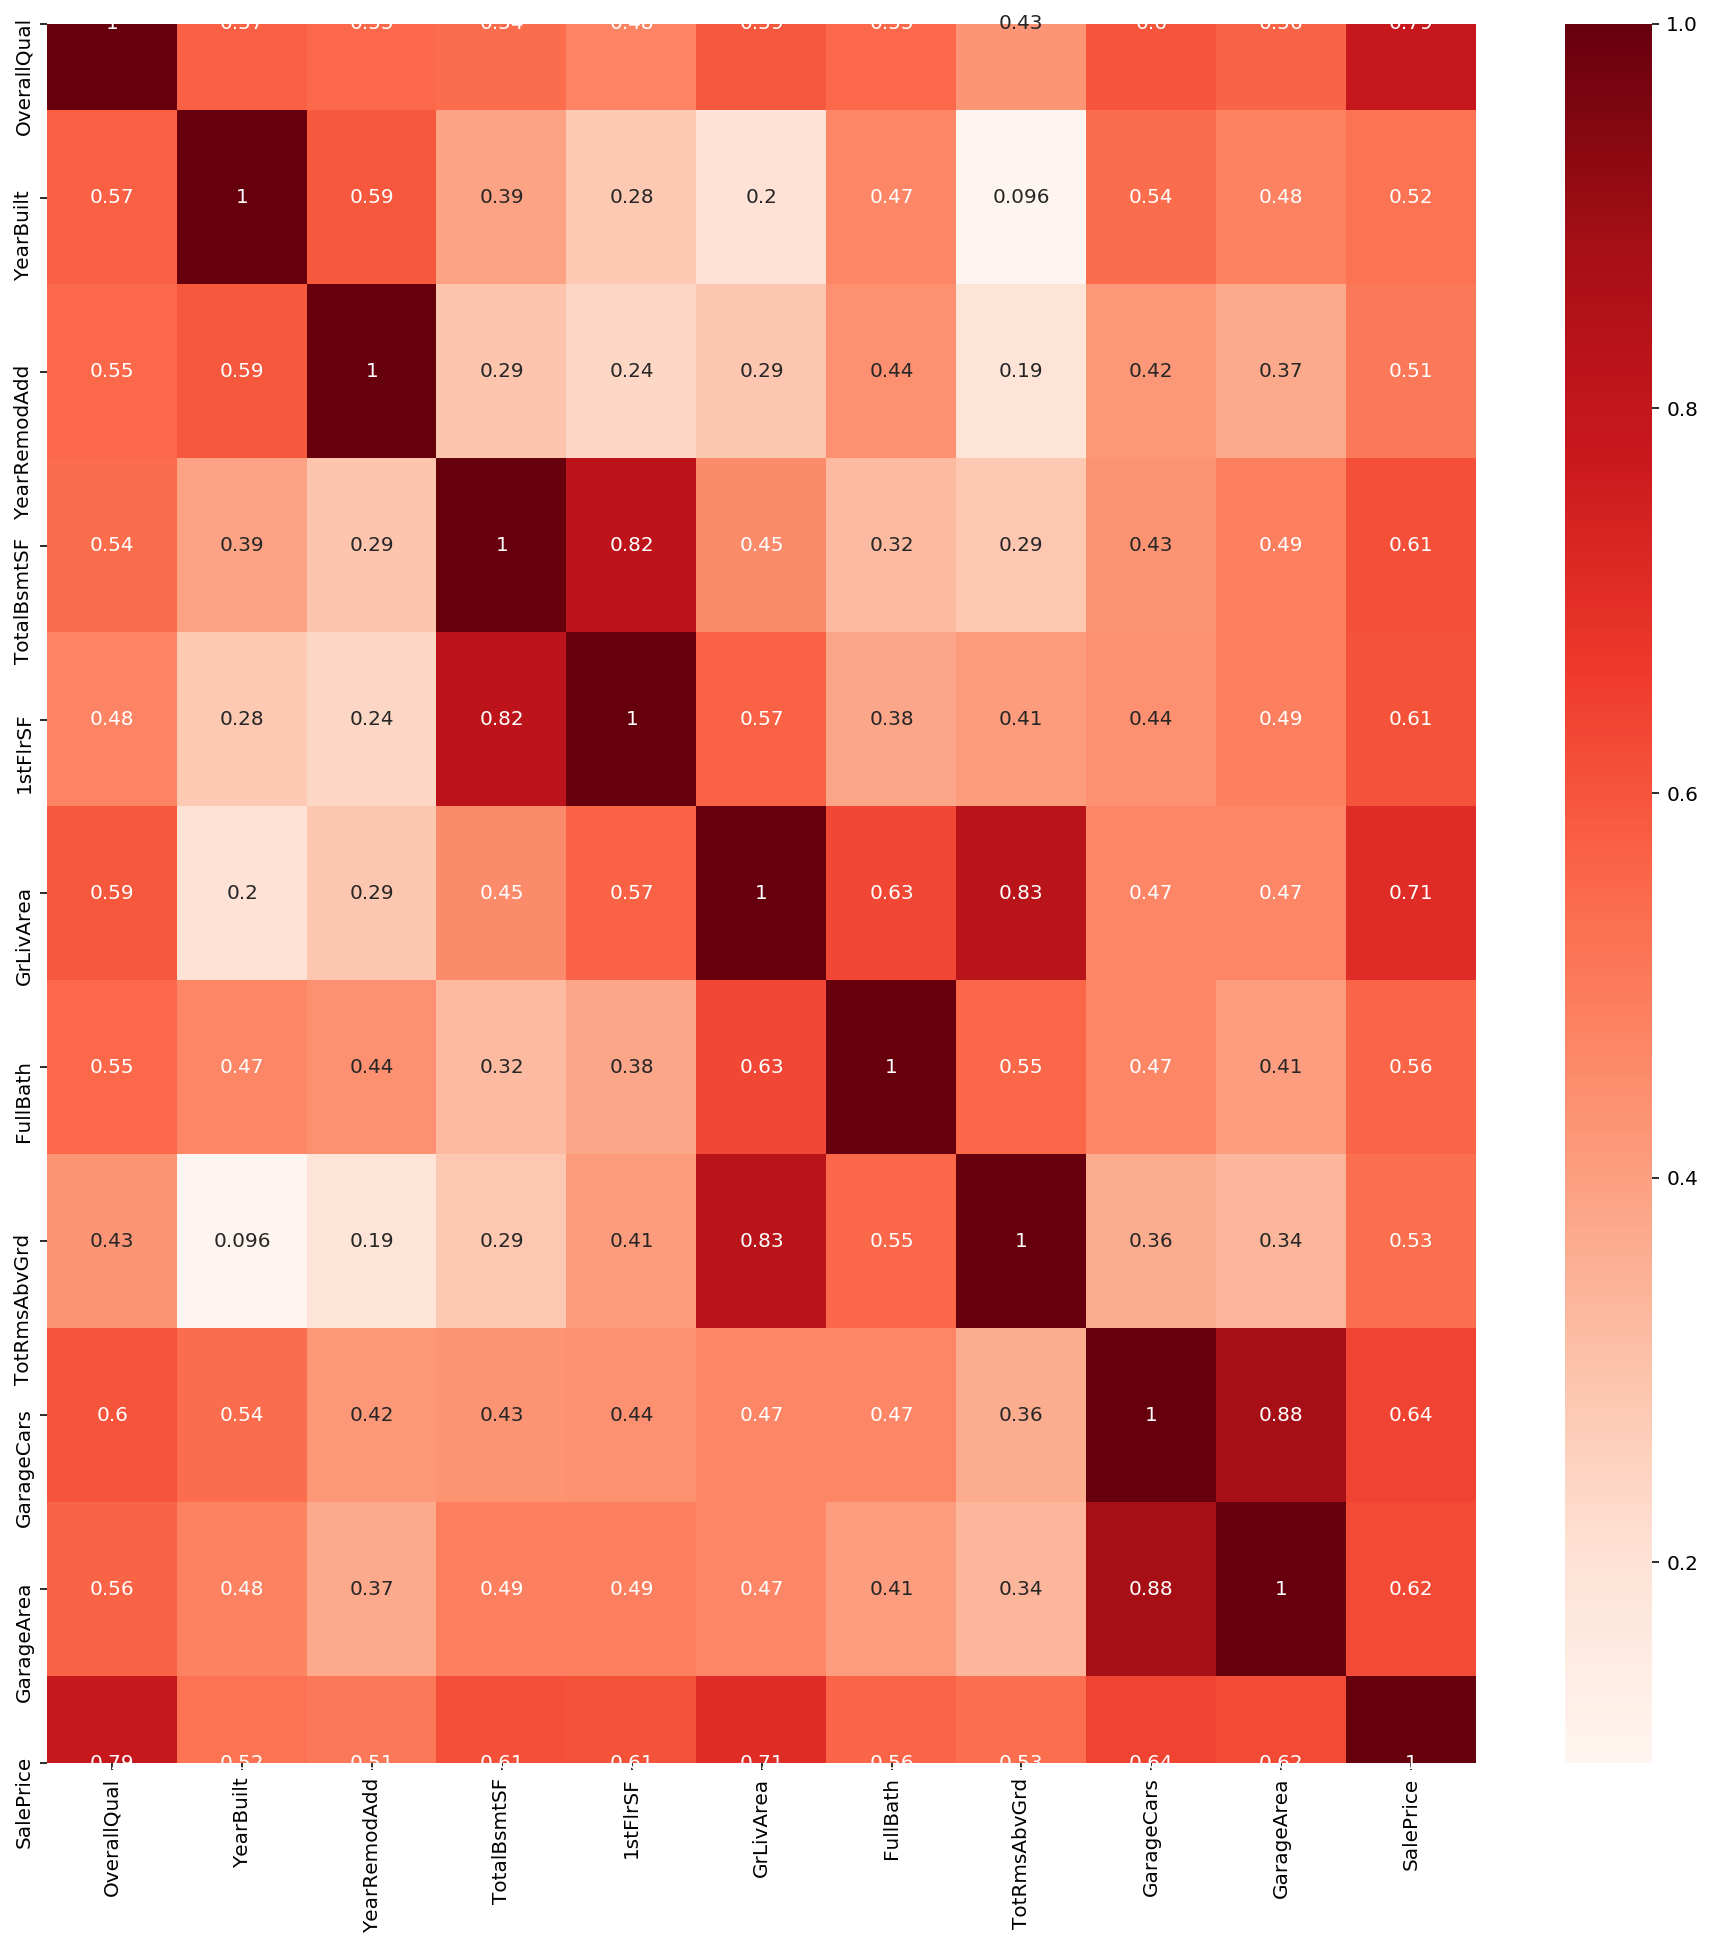

In [7]:
#GRÁFICAMOS LAS CORRELACIONES
plt.figure(figsize=(16,16))
cor = housing.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [8]:
#DESCRIPTIVOS DE SALEPRICE
housing.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

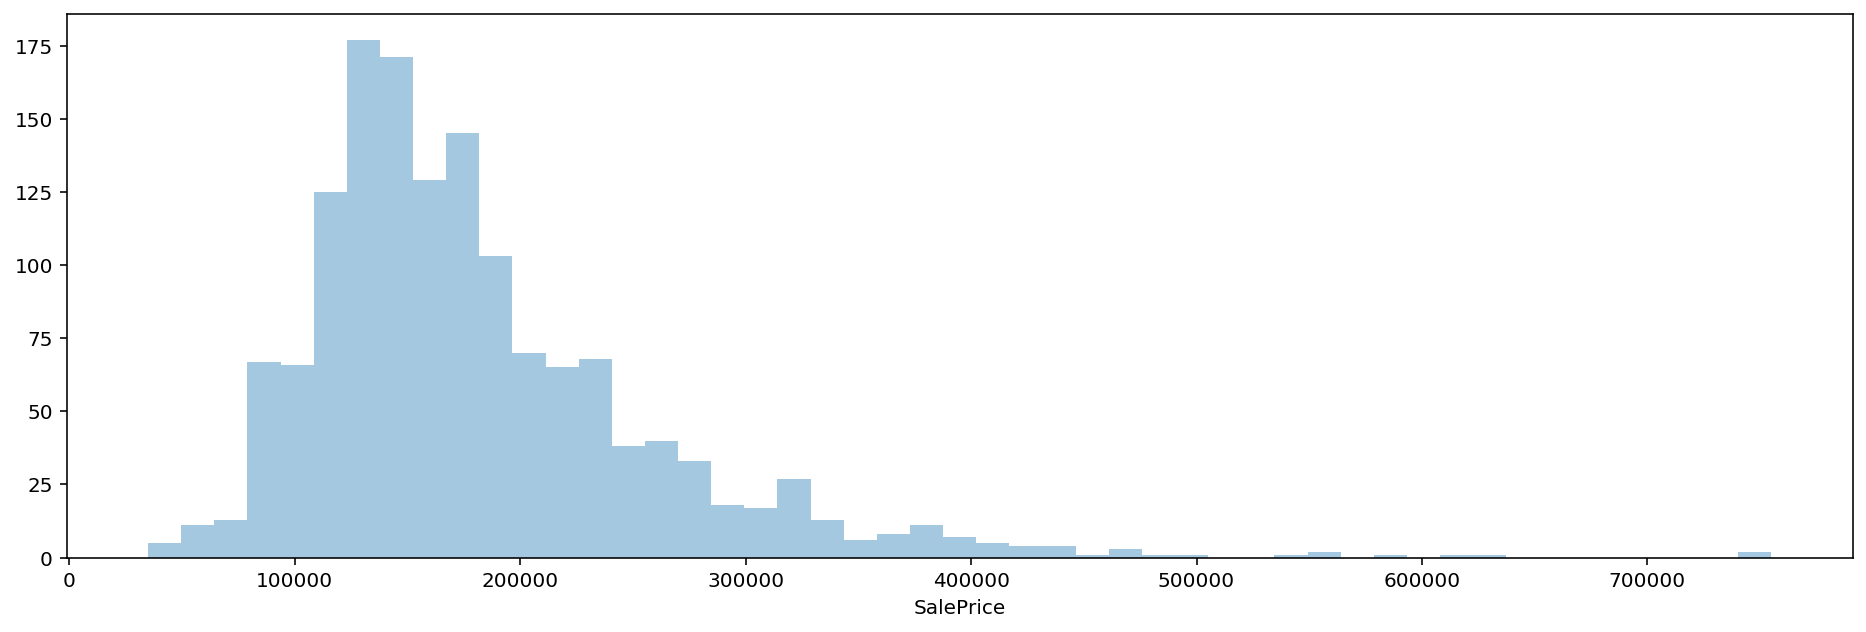

In [9]:
#DISTRIBUCION DE SALEPRICE
plt.figure(figsize=(16,5))
sns.distplot(housing.SalePrice, kde=False)

In [10]:
#GENERAMOS BASE DE ENTRENAMIENTO Y PRUEBA
train, test = train_test_split(housing, test_size=.5, random_state=2718)
xtrain, ytrain = train.drop("SalePrice", axis=1), train["SalePrice"]
xtest, ytest = test.drop("SalePrice", axis=1), test["SalePrice"]

### Regresión

In [11]:
bag_clf = BaggingRegressor(
 LinearRegression(), n_estimators=500,
 max_samples=100, bootstrap=True, n_jobs=-1
 )

bag_clf.fit(xtrain, ytrain)
y_pred = bag_clf.predict(xtest)

In [12]:
from sklearn.metrics import r2_score
r2_score(ytest, y_pred)


0.8220356802866668

In [13]:
#Baggin para el modelo de regresion
modelo_base = BaggingRegressor(base_estimator=LinearRegression(), bootstrap=True, n_jobs=-1)

In [14]:
#Seleccionamos lista de parámetros
param_grid = {"n_estimators":list(range(100,501,50)),
             "max_samples":list(range(20,201,20))}

In [15]:
#Arrojamos parámetros al modelo
#definimos r2 cómo el score de evaluación
grid_search = GridSearchCV(modelo_base,param_grid=param_grid,cv=7,n_jobs=-1,scoring="r2")

In [16]:
#Buscamos por grid serach basado en los parámetros
grid_search.fit(xtrain,ytrain)

GridSearchCV(cv=7, error_score=nan,
             estimator=BaggingRegressor(base_estimator=LinearRegression(copy_X=True,
                                                                        fit_intercept=True,
                                                                        n_jobs=None,
                                                                        normalize=False),
                                        bootstrap=True,
                                        bootstrap_features=False,
                                        max_features=1.0, max_samples=1.0,
                                        n_estimators=10, n_jobs=-1,
                                        oob_score=False, random_state=None,
                                        verbose=0, warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_samples': [20, 40, 60, 80, 100, 120, 140, 160,
                                         180, 200],
                         'n_es

In [17]:
#EL MEJOR MODELO BAJO EL SCORE R2 NOS ARROJA
grid_search.best_score_

0.7300923813860374

In [18]:
#CON LOS PARÁMETROS DE GRID:
grid_search.best_params_

{'max_samples': 20, 'n_estimators': 100}

### LASSO

In [19]:
bag_clf = BaggingRegressor(
 Lasso(alpha=0.1, tol=0.5), n_estimators=500,
 max_samples=100, bootstrap=True, n_jobs=-1
 )

bag_clf.fit(xtrain, ytrain)
y_pred = bag_clf.predict(xtest)

In [20]:
from sklearn.metrics import r2_score
r2_score(ytest, y_pred)


0.7897475263121345

In [21]:
#Baggin para el modelo de LASSO
modelo_base = BaggingRegressor(base_estimator=Lasso(alpha=0.1, tol=0.5), bootstrap=True, n_jobs=-1)

In [22]:
#Seleccionamos lista de parámetros
param_grid = {"n_estimators":list(range(100,501,50)),
             "max_samples":list(range(20,201,20))}

In [23]:
#Arrojamos parámetros al modelo
#definimos r2 cómo el score de evaluación
grid_search = GridSearchCV(modelo_base,param_grid=param_grid,cv=7,n_jobs=-1,scoring="r2")

In [24]:
#Buscamos por grid search basado en los parámetros
grid_search.fit(xtrain,ytrain)

GridSearchCV(cv=7, error_score=nan,
             estimator=BaggingRegressor(base_estimator=Lasso(alpha=0.1,
                                                             copy_X=True,
                                                             fit_intercept=True,
                                                             max_iter=1000,
                                                             normalize=False,
                                                             positive=False,
                                                             precompute=False,
                                                             random_state=None,
                                                             selection='cyclic',
                                                             tol=0.5,
                                                             warm_start=False),
                                        bootstrap=True,
                                        bootstrap_features=F

In [25]:
#EL MEJOR MODELO BAJO EL SCORE R2 NOS ARROJA
grid_search.best_score_

0.6873641633986775

In [26]:
#CON LOS PARÁMETROS DE GRID:
grid_search.best_params_

{'max_samples': 60, 'n_estimators': 100}

### Ridge

In [27]:
bag_clf = BaggingRegressor(
 Ridge(alpha=0.1), n_estimators=500,
 max_samples=100, bootstrap=True, n_jobs=-1
 )

bag_clf.fit(xtrain, ytrain)
y_pred = bag_clf.predict(xtest)

In [28]:
from sklearn.metrics import r2_score
r2_score(ytest, y_pred)

0.8215151300395158

In [29]:
#Baggin para el modelo de RIDGE
modelo_base = BaggingRegressor(base_estimator=Lasso(alpha=0.1, tol=0.5), bootstrap=True, n_jobs=-1)

In [30]:
#Seleccionamos lista de parámetros
param_grid = {"n_estimators":list(range(100,501,50)),
             "max_samples":list(range(20,201,20))}

In [31]:
#Arrojamos parámetros al modelo
#definimos r2 cómo el score de evaluación
grid_search = GridSearchCV(modelo_base,param_grid=param_grid,cv=7,n_jobs=-1,scoring="r2")

In [32]:
#Buscamos por grid search basado en los parámetros
grid_search.fit(xtrain,ytrain)

GridSearchCV(cv=7, error_score=nan,
             estimator=BaggingRegressor(base_estimator=Lasso(alpha=0.1,
                                                             copy_X=True,
                                                             fit_intercept=True,
                                                             max_iter=1000,
                                                             normalize=False,
                                                             positive=False,
                                                             precompute=False,
                                                             random_state=None,
                                                             selection='cyclic',
                                                             tol=0.5,
                                                             warm_start=False),
                                        bootstrap=True,
                                        bootstrap_features=F

In [33]:
#EL MEJOR MODELO BAJO EL SCORE R2 NOS ARROJA
grid_search.best_score_

0.6856414893571978

In [34]:
#CON LOS PARÁMETROS DE GRID:
grid_search.best_params_

{'max_samples': 20, 'n_estimators': 150}

### EL MODELO QUE NOS ARROJA MEJOR PERFORMANCE BAJO BAGGIN ES EL DE REGRESION